# Machine Learning-Powered Crop Management Challenge

### Problem Statement:

In the realm of agriculture, harnessing the potential of machine learning is a key puzzle to solve. Your challenge is to leverage the capabilities of machine learning to create innovative solutions that optimize crop management for farm businesses. Develop ML-driven tools that enable efficient scheduling, crop health monitoring, and precise pest and disease management.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                                                        
%matplotlib inline

### Reading Dataset

In [ ]:
df = pd.read_csv('/work/CropRecommendation.csv')

This dataset is acquired from kaggle.com and can be found at https://www.kaggle.com/datasets/siddharthss/crop-recommendation-dataset.

### Details of the Dataset

In [ ]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


As we can see above, the data set has 9 columns. The last two of them are dummy ones with no values. Each of the columns are:

Nitrogen - Ratio of Nitrogen content in soil

Phosphorous - Ratio of Phosphorous content in soil

Potassium - Ratio of Potassium content in soil

Temperature - Average temperature in degree celsius

Humidity - Relative humidity content in soil in percentage

pH - pH value of the soil

Rainfall - Rain fall in mm

### Checking for Nan Values A.K.A Missing Values

<AxesSubplot: >

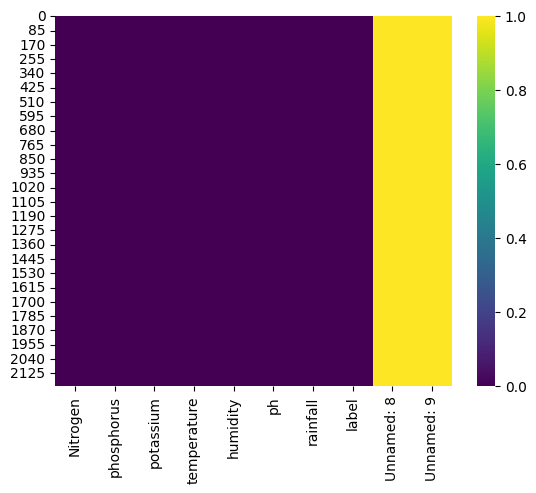

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

No none values in the first 7 columns. Column 8 and 9 will meddle in the further calculations. So let's proceed to remove them first.

In [ ]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 8','Unnamed: 9'],inplace=True)

### Feature Extraction

NOTE!!!

Since health is a relative term which varies with the environment it is used in, here we consider certain types of plants to be healthy. It is far more time consuming to try and find a dataset that contains the health of plants with regards to other environments merely considering the miniscule possibility that they exist, the next step would be to try web scraping. However we can only scrape information that has already been gathered and is available to the general public. As of my research prior to this project and to the best of my knowledge there is none.

I am assuming the type of plants that require low temperature and high humidity to be unhealthy meaning the other types of plants within the given data range is considered healthy. I use K-Means clustering to group together similar types of plants and regroup them to binary classification of healthy and unhealthy.

K-Means Clustering

K-means clustering is a widely used unsupervised machine learning algorithm that can be applied to various fields, including agriculture. In agriculture, K-means clustering can be used for a variety of purposes, including crop classification, yield prediction, disease detection, and farm management.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['label'])
print(features.columns)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=101)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall'],
      dtype='object')


In [ ]:
import joblib
joblib.dump(kmeans, 'models/kmeans_model.pkl')

['models/kmeans_model.pkl']

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"rainfall"},"color":{"sort":null,"type":"quantitative","field":"Cluster","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [ ]:
df['CropHealth'] = df['Cluster'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"rainfall"},"color":{"sort":null,"type":"quantitative","field":"CropHealth","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [ ]:
x = df.drop(columns=['label','Cluster','CropHealth'])
y = df['CropHealth']

Now that we are done with feature extraction, EDA is next up on the list.

### EDA ( Exploratory Data Analysis)

<AxesSubplot: >

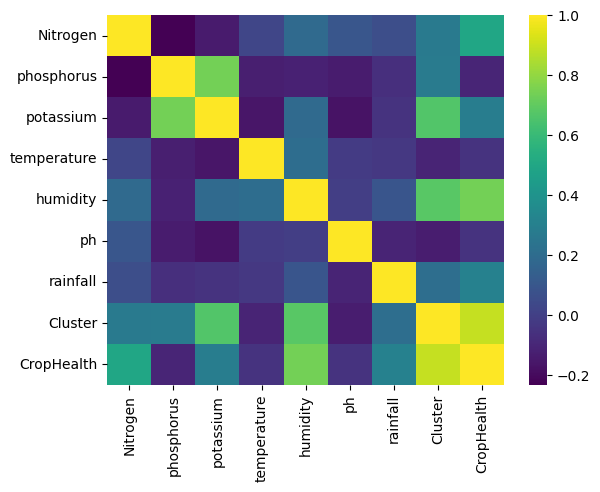

In [ ]:
sns.heatmap(df.corr(numeric_only=True),cmap='viridis')

There isn't much correlation for any features with respect to crop health.

### Machine Learning

Since its best to try multiple ml models to get the better output, lets try tree models. Logistic Regression is a no-go as we saw from EDA.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.3,random_state=42)

### Decision Tree

Decision trees are a versatile and widely used machine learning technique that can be applied to various fields, including agriculture. In agriculture, decision trees can help farmers, agronomists, and researchers make informed decisions about crop management, pest control, and other important aspects of farming. 

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
z = dt.predict(xtest)

In [ ]:
print("ACC :",accuracy_score(y_pred=z,y_true=ytest))
print("F1 :",f1_score(y_pred=z,y_true=ytest))

ACC : 0.9863636363636363
F1 : 0.9891435464414958


In [ ]:
print(confusion_matrix(ytest,z))

[[241   3]
 [  6 410]]


Decision Tree has a high accuracy of 98%.

### Random Forest

Random Forest is a powerful machine learning algorithm that can be particularly beneficial in the context of agriculture. It is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and robustness. In agriculture, Random Forest can be applied in various ways to enhance decision-making and optimize farming practices

In [ ]:
rfc = RandomForestClassifier(20)
rfc.fit(xtrain,ytrain)
z = rfc.predict(xtest)

In [ ]:
print("ACC :",accuracy_score(y_pred=z,y_true=ytest))
print("F1 :",f1_score(y_pred=z,y_true=ytest))

ACC : 0.9893939393939394
F1 : 0.991556091676719


In [ ]:
print(confusion_matrix(ytest,z))

[[242   2]
 [  5 411]]


Random Forest has an even higher accuracy of 99%

### Conclusion

As we can see from both the metrics and the confusion matrix that the Random Forest model scored higher. Let's use it to build our ml app.

### Model Deployment

I am going to build the app in a separate file. So lets store the Random Forest model so that it can be used there.

In [ ]:
import pickle

with open('models/model.pkl','wb') as f:

    pickle.dump(rfc,f)

In [ ]:
df.drop(columns=['label','Cluster']).to_csv('data/df2.csv')

In [ ]:
with open('data/avg.txt','w') as f:
    f.write(str(df[df['CropHealth'] == 1].describe().loc['mean'].to_list()[:-2])[1:-1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=83044938-3119-40ea-a624-7cc05e5ac7f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>